<a href="https://colab.research.google.com/github/subbalakshmi3011/210701263_DEEP_LEARNING_CONCEPTS/blob/main/EXP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
# Load the IMDB dataset
num_words = 10000  # Top 10,000 words to consider
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Pad sequences to ensure uniform input size
maxlen = 100  # Maximum length of sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Define the RNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),  # Embedding layer
    SimpleRNN(64, activation='tanh'),  # RNN layer
    Dense(1, activation='sigmoid')     # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.6722 - loss: 0.5800 - val_accuracy: 0.8290 - val_loss: 0.3896
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.8868 - loss: 0.2877 - val_accuracy: 0.8126 - val_loss: 0.4222
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9472 - loss: 0.1479 - val_accuracy: 0.8012 - val_loss: 0.5306
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9798 - loss: 0.0683 - val_accuracy: 0.8038 - val_loss: 0.6309
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9964 - loss: 0.0169 - val_accuracy: 0.8112 - val_loss: 0.7189


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8053 - loss: 0.7448
Test loss: 0.7399265766143799
Test accuracy: 0.8077999949455261


In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

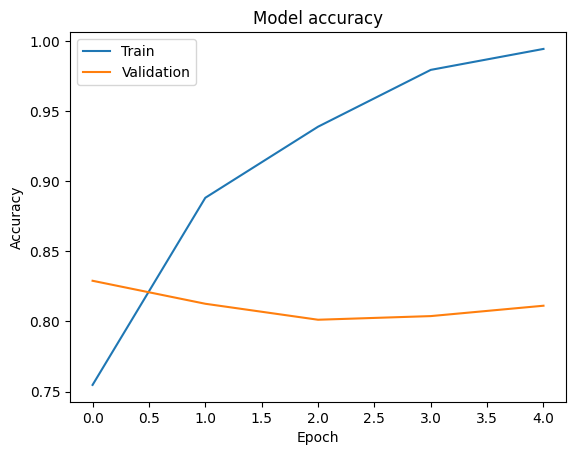

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

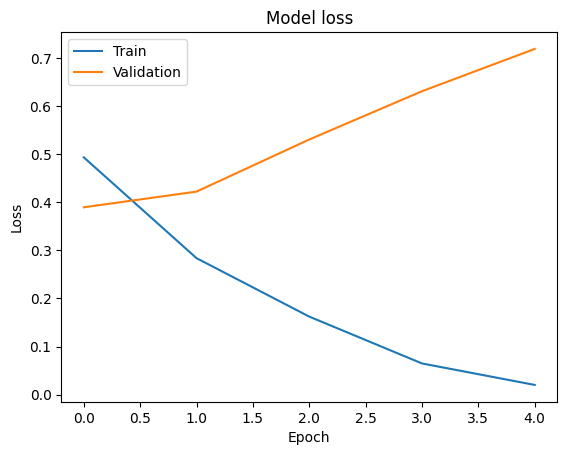

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()